# EDA

In [4]:
# import packages
import pandas as pd
import matplotlib
from matplotlib import pylab as plt
import pickle

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import GroupShuffleSplit, GroupKFold#, StratifiedGroupKFold


# read in data, drop rows with CDR of 2.0, not enough data points
df = pd.read_csv('../data/oasis_longitudinal.csv')
df = df.rename(columns = {'M/F':'Gender'})
df = df[df.CDR != 2.0]
refdf = df.drop_duplicates(subset=['Subject ID'])
groupdf = df.groupby('Subject ID').mean()

In [78]:
# print data frame shape, types
print(df.shape)
print(refdf.shape)
print(groupdf.shape)
df.dtypes

(370, 15)
(150, 15)
(150, 10)


Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
Gender         object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [79]:
# check to see if target variable is categorical or continuous - categorical, only 4 unique values, levels of dementia
print(df['CDR'].value_counts())
print(refdf['CDR'].value_counts())

0.0    206
0.5    123
1.0     41
Name: CDR, dtype: int64
0.0    85
0.5    52
1.0    13
Name: CDR, dtype: int64


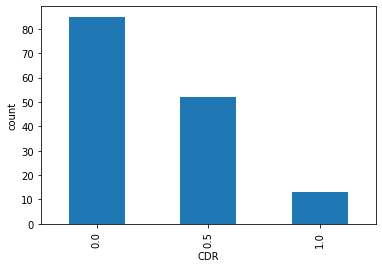

In [80]:
pd.value_counts(refdf['CDR']).plot.bar()
plt.ylabel('count')
plt.xlabel('CDR')
plt.savefig('../figures/CDR_hist.png', bbox_inches='tight')
plt.show()

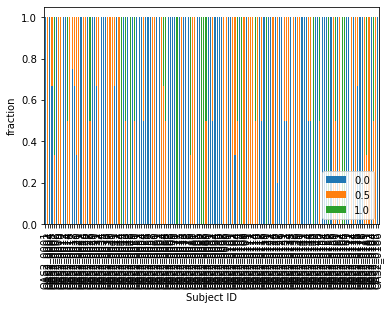

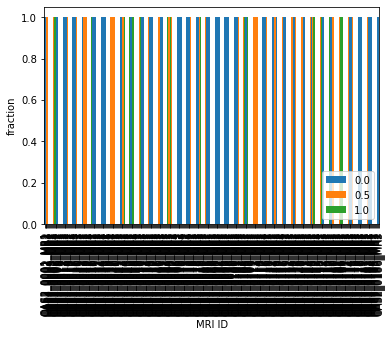

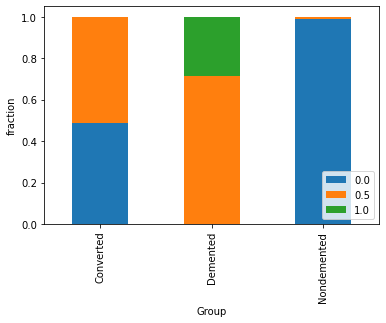

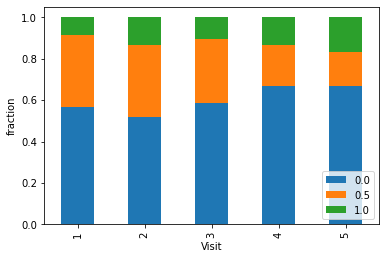

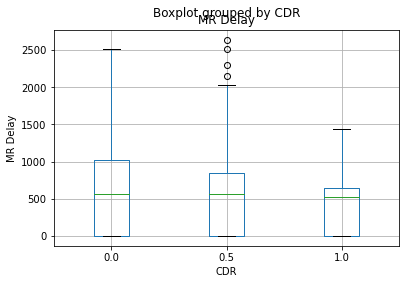

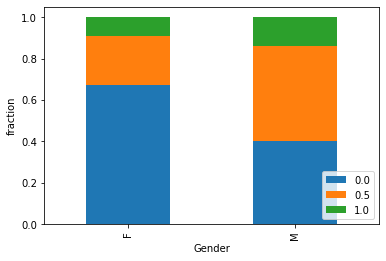

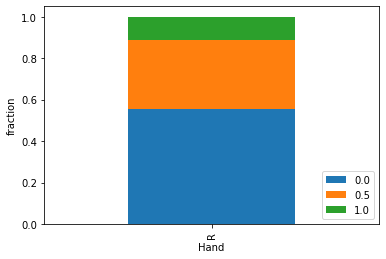

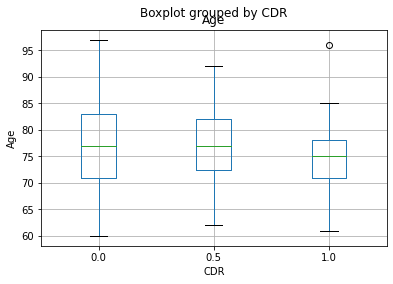

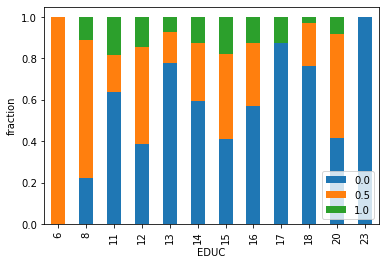

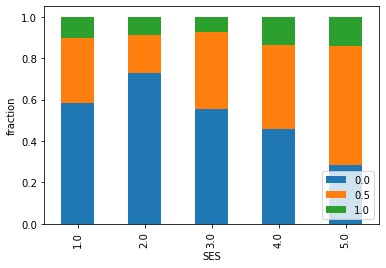

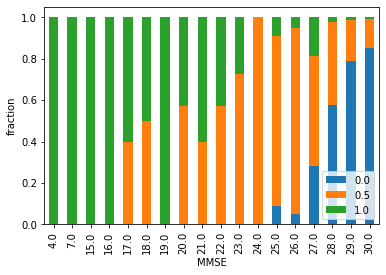

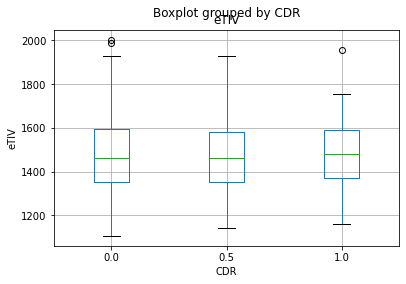

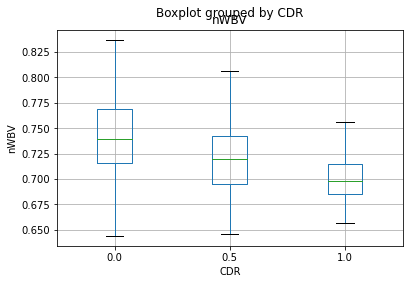

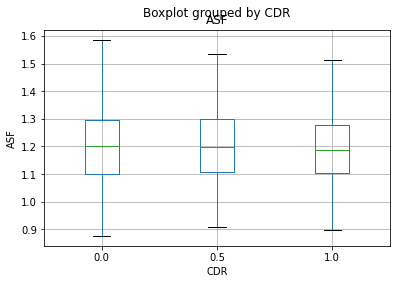

In [72]:
# create variable for categorical vs continuous, specify the target variable
cat = False
target = 'CDR'
temp = df.drop(columns=['CDR'])

# loop through all columns except the target variable
for i in range(0, len(temp.columns)): 
    
    # pull out the column and the name of the column
    col = temp.iloc[:, i]
    cname = col.name

    # if the type of the column is 'object', automatically set to categorical
    if col.dtype == 'object':
        cat = True
    
    # need further logic if not 'object'
    else:
        
        # if there are fewer than 20 unique values in the column, we'll call it categorical (note: this may 
        # misclassify one or two columns, but we'd be able to recognize any misclassification in the plots)
        if len(col.value_counts()) < 20:
            cat = True
        else:
            cat = False
    
    # create a stacked bar chart for categorical columns with appropriate axis labels
    if cat == True:
        count_matrix = df.groupby([cname, target]).size().unstack()
        count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
        count_matrix_norm.plot(kind='bar', stacked=True)
        plt.ylabel('fraction')
        plt.legend(loc=4)
        plt.savefig("../figures/" + cname + "_CDR_stackedbar.png", bbox_inches='tight')
        plt.show()
        
    # create a box plot for continuous columns with appropriate axis labels
    else:
        df[[target, cname]].boxplot(by=target)
        plt.ylabel(cname)
        plt.xlabel(target)
        plt.savefig("../figures/" + cname + "_CDR_boxplot.png", bbox_inches='tight')
        plt.show()

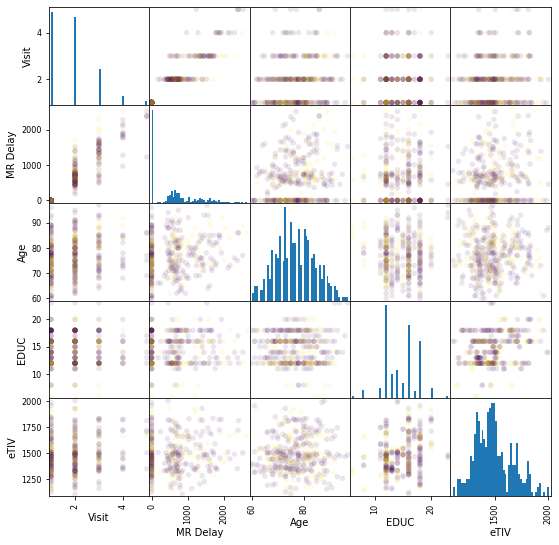

In [73]:
# create a scatter matrix
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(9, 9),c = pd.get_dummies(df['CDR']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.1)
plt.savefig("../figures/scattermatrix.png", bbox_inches='tight')
plt.show()

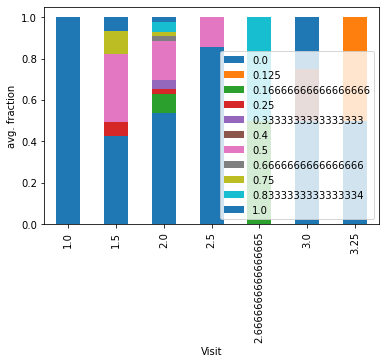

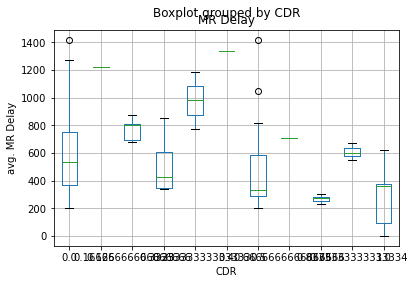

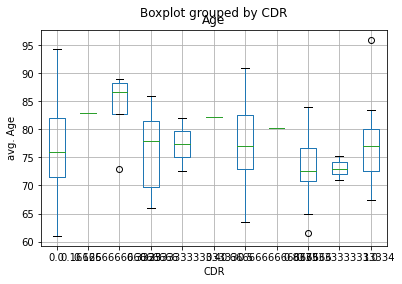

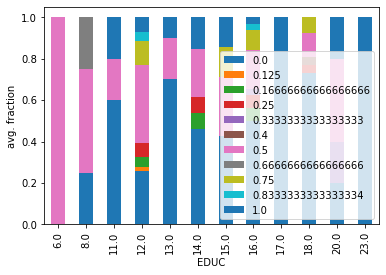

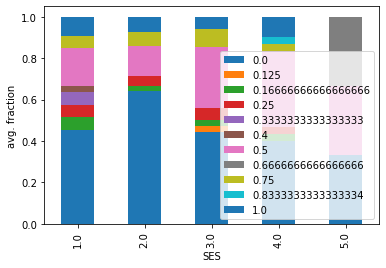

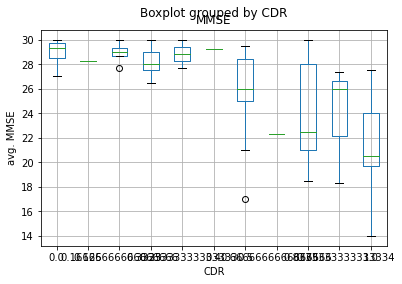

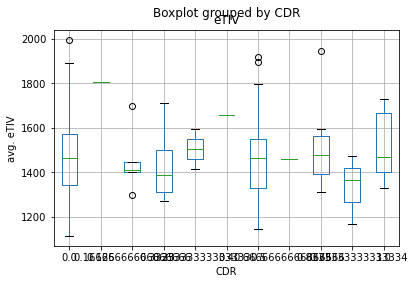

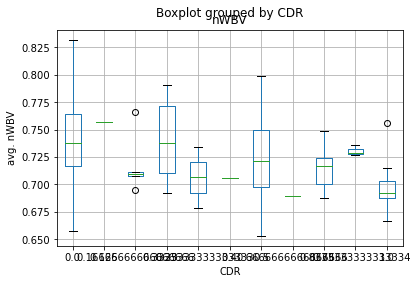

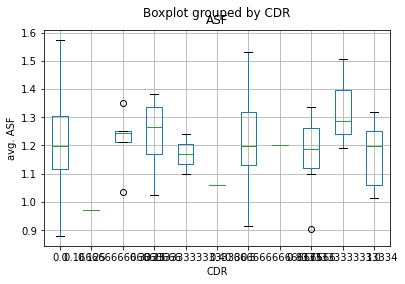

In [81]:
# create figures for average CDRs

# create variable for categorical vs continuous, specify the target variable
cat = False
target = 'CDR'
temp = groupdf.drop(columns=['CDR'])

# loop through all columns except the target variable
for i in range(0, len(temp.columns)): 
    
    # pull out the column and the name of the column
    col = temp.iloc[:, i]
    cname = col.name

    # if the type of the column is 'object', automatically set to categorical
    if col.dtype == 'object':
        cat = True
    
    # need further logic if not 'object'
    else:
        
        # if there are fewer than 20 unique values in the column, we'll call it categorical (note: this may 
        # misclassify one or two columns, but we'd be able to recognize any misclassification in the plots)
        if len(col.value_counts()) < 20:
            cat = True
        else:
            cat = False
    
    # create a stacked bar chart for categorical columns with appropriate axis labels
    if cat == True:
        count_matrix = groupdf.groupby([cname, target]).size().unstack()
        count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
        count_matrix_norm.plot(kind='bar', stacked=True)
        plt.ylabel('avg. fraction')
        plt.legend(loc=4)
        plt.savefig("../figures/avg_" + cname + "_CDR_stackedbar.png", bbox_inches='tight')
        plt.show()
        
    # create a box plot for continuous columns with appropriate axis labels, given categorical target
    else:
        groupdf[[target, cname]].boxplot(by=target)
        plt.ylabel("avg. " + cname)
        plt.xlabel(target)
        plt.savefig("../figures/avg_" + cname + "_CDR_boxplot.png", bbox_inches='tight')
        plt.show()

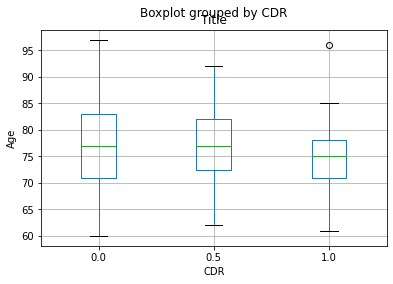

In [30]:
## not used
df[['CDR', 'Age']].boxplot(by='CDR')
# plt.boxplot(df[['CDR', 'Age']])#, by=df['CDR'])
plt.title('Title')
plt.ylabel('Age')
plt.xlabel('CDR')
# plt.savefig("../figures/" + cname + "_CDR_boxplot.png", bbox_inches='tight')
plt.show()

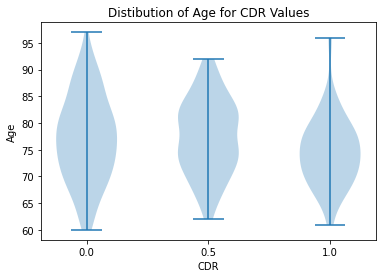

In [27]:
## EDA report figure 1
dataset = [df[df['CDR']==0.0]['Age'].values,
           df[df['CDR']==0.5]['Age'].values,
           df[df['CDR']==1.0]['Age'].values,]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],[0.0,0.5,1.0])
plt.title('Distibution of Age for CDR Values')
plt.ylabel('Age')
plt.xlabel('CDR')
plt.savefig("../figures/reportfigs/Age_CDR_violin.png", bbox_inches='tight', dpi=300)
plt.show()

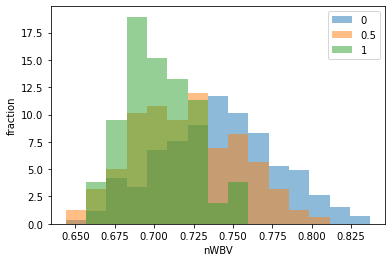

In [113]:
## not used

categories = df['CDR'].unique()
bin_range = (df['nWBV'].min(),df['nWBV'].max())
labels = [0, 0.5, 1]

for c in categories:
    plt.hist(df[df['CDR']==c]['nWBV'],alpha=0.5,label=c,range=bin_range,bins=15,density=True)
plt.legend(labels)
plt.ylabel('fraction')
plt.xlabel('nWBV')
plt.show()

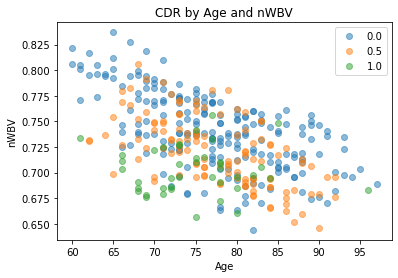

In [65]:
## EDA report figure 2
groups = df.groupby("CDR")
for name, group in groups:
    plt.plot(group['Age'], group['nWBV'], marker="o", linestyle="", label=name, alpha=0.5)
plt.title("CDR by Age and nWBV")
plt.xlabel('Age')
plt.ylabel('nWBV')
plt.legend()
plt.savefig("../figures/reportfigs/Age_nWBV_CDR_scatter.png", bbox_inches='tight', dpi=300)
plt.show()


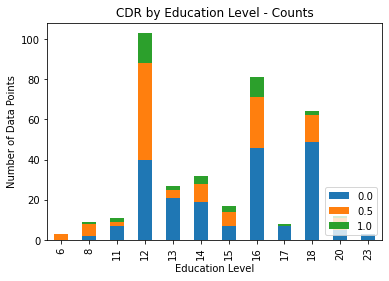

In [32]:
## EDA report figure 3

count_matrix = df.groupby(['EDUC', 'CDR']).size().unstack()
#count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix.plot(kind='bar', stacked=True)
plt.title('CDR by Education Level - Counts')
plt.ylabel('Number of Data Points')
plt.xlabel('Education Level')
plt.legend(loc=4)
plt.savefig("../figures/reportfigs/EDUC_CDR_stackedbar_counts.png", bbox_inches='tight', dpi=300)

plt.show()

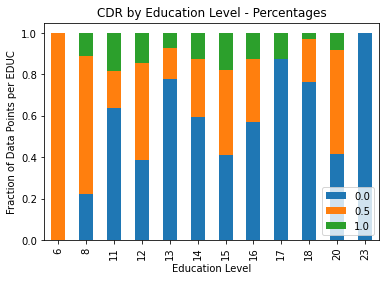

In [28]:
## EDA report figure 3
count_matrix = df.groupby(['EDUC', 'CDR']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
#plt.plot(count_matrix_norm, kind='bar', stacked=True)
plt.title('CDR by Education Level - Percentages')
plt.ylabel('Fraction of Data Points per EDUC')
plt.xlabel('Education Level')
plt.legend(loc=4)
plt.savefig("../figures/reportfigs/EDUC_CDR_stackedbar_fractions.png", bbox_inches='tight', dpi=300)

plt.show()

# Data Preprocessing

In [6]:
# clean, split, preprocess

# create feature matrix X and target variable array y, as well as list of groups based on Subject ID
# X = df[['Subject ID', 'Visit', 'MR Delay', 'Gender', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
X = df[['Subject ID', 'Gender', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
y = df['CDR']
groups_test = df['Subject ID']
random_state = 5


X
# y
# groups_test

# collect which encoder to use on each feature
# ordinal_ftrs = ['Visit', 'EDUC']
# ordinal_cats = [[1, 2, 3, 4, 5], list(range(1, 24))]
ordinal_ftrs = ['EDUC']
ordinal_cats = [list(range(1, 24))]

onehot_ftrs = ['Gender', 'SES']
minmax_ftrs = ['Age', 'MMSE', 'nWBV']
# std_ftrs = ['MR Delay', 'eTIV', 'ASF']
std_ftrs = ['eTIV', 'ASF']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

# create split objects for initial GroupShuffleSplit and subsequent GroupKFold, random state to ensure reproducibility
gss_test = GroupShuffleSplit(n_splits=1, test_size=.2, random_state=random_state)
group_kfold_train = GroupKFold(n_splits=4)
# test = ms.StratifiedGroupKFold(n_splits=5)
# test

# separate test set from other sets
for other_idx, test_idx in gss_test.split(X, y, groups_test):
    X_other = X.iloc[other_idx, :]
    X_test = X.iloc[test_idx, :]
    y_other = y.iloc[other_idx]
    y_test = y.iloc[test_idx]

    # create list of groups in the train/val feature matrix
    groups_train = X_other['Subject ID']
    
#     X_other = X_other.drop(columns=['Subject ID'])
#     X_test = X_test.drop(columns=['Subject ID'])
    
#     # check to see if each target class is represented in test
#     print(y_test.value_counts())
#     print(y_other.value_counts())

    # do GroupKFolds split for training and validation data
    for train_idx, val_idx in group_kfold_train.split(X_other, y_other, groups_train):
        X_train = X.iloc[train_idx, :]
        X_val = X.iloc[val_idx, :]
        y_train = y.iloc[train_idx]
        y_val = y.iloc[val_idx]
        
#         # check to see if each target class is represented in train and val
#         print("train:\n", y_train.value_counts())
#         print("val:\n", y_val.value_counts())
        
        # preprocess the data
        clf = Pipeline(steps=[('preprocessor', preprocessor)])
        X_train_prep = clf.fit_transform(X_train)
        X_val_prep = clf.transform(X_val)
        X_test_prep = clf.transform(X_test)
        
#         #check shapes
#         print(X_train.shape)
#         print(X_train_prep.shape)
#         display(pd.DataFrame(X_train))
#         display(pd.DataFrame(X_train_prep))


        file = open('../data/data_preprocessed.save', 'wb')
        pickle.dump((X_train_prep, X_val_prep, X_test_prep, y_train, y_val, y_test),file)
        file.close()

# # check distribution of data into sets
# print("train proportion: ", X_train_prep.shape[0]/X.shape[0])
# print("val proportion: ", X_val_prep.shape[0]/X.shape[0])
# print("test proportion: ", X_test_prep.shape[0]/X.shape[0])

In [25]:
# df.hist('ASF')
# list(range(1, 24))